In [1]:
#DataFlair 
#load all the libraries
from music21 import *
import glob
from tqdm import tqdm
import numpy as np
import random
from matplotlib import pyplot as plt
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from tensorflow.keras.models import Sequential,Model,load_model 
from sklearn.model_selection import train_test_split

In [2]:
def read_files(input_file):
  notes=[]
  notes_to_parse=None
  #parse the midi file
  midi_file=converter.parse(input_file)
  #seperate all instruments from the file
  instr=instrument.partitionByInstrument(midi_file)

  for part in instr.parts:
    #fetch data only of Piano instrument
    if 'Piano' in str(part):
      notes_to_parse=part.recurse()

      #iterate over all the parts of sub stream elements
      #check if element's type is Note or chord
      #if it is chord split them into notes
      for element in notes_to_parse:
        if type(element)==note.Note:
          notes.append(str(element.pitch))
        elif type(element)==chord.Chord:
          notes.append('.'.join(str(n) for n in element.normalOrder))

  #return the list of notes
  return notes

In [3]:
#retrieve paths recursively from inside the directories/files
file_path=["mozart"]
all_files=glob.glob("D:/InnoRave/Automatic Music Generation/automatic-music-generation-codes/" + 'All Midi Files/'+file_path[0]+'/*.mid',recursive=True)

In [4]:
#reading each midi file
notes_array = np.array([read_files(i) for i in tqdm(all_files,position=0,leave=True)])
notes_array

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.68s/it]
C:\Users\Gunjan\AppData\Local\Temp/ipykernel_4712/3839694136.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_files(i) for i in tqdm(all_files,position=0,leave=True)])


array([list(['2.6.9', '9.2', 'G5', '2.6', 'F#5', 'E5', 'F#5', 'A5', '4.7', 'G5', 'F#5', 'G5', 'A5', '6.9', 'A5', 'B5', 'C#6', 'D6', 'A5', 'F#3', 'D4', 'F#5', 'D3', 'D4', 'A5', 'E3', 'G5', 'F#5', 'D4', 'G5', 'A5', 'A3', 'G5', 'C#4', 'F5', '2', 'F#5', 'G5', '2.6', 'F#5', 'E5', 'F#5', 'A5', '4.7', 'G5', 'F#5', 'G5', 'A5', '6.9', 'A5', 'B5', 'C#6', 'D6', 'A5', 'F#3', 'D4', 'F#5', 'D3', 'D4', 'A5', 'E3', 'G5', 'F#5', 'D4', 'G5', 'A5', 'A3', 'G5', 'F#5', 'C#4', 'E5', 'D5', 'D4', 'F#4', 'A4', 'D4', 'F#4', '6.7', 'D4', '6.7', 'F#4', '6.7', '6.7', 'D4', 'F#5', 'E5', 'F#4', 'D5', 'C#5', 'E4', 'G4', 'A4', 'E4', 'G4', 'E5', 'E4', 'F#4', 'G4', 'F#4', 'E4', 'D4', 'C#4', 'B3', 'E5', 'A3', 'C#4', 'A4', 'A3', 'C#4', '7.9', 'A3', '7.9', 'C#4', '7.9', '7.9', 'G3', 'G5', 'F#5', 'C#4', 'E5', 'D5', 'F#3', 'D4', 'A4', 'F#3', 'D4', 'F#5', 'F#3', 'D3', 'E3', 'F#3', 'G3', 'A3', 'B3', 'C#4', 'F#5', 'D4', 'D5', 'E5', 'F#5', 'G5', 'A5', 'B5', 'C#6', 'D6', 'C#6', 'B5', '6.9', 'A5', 'G5', '6.9', 'F#5', 'E5', '6.9', 

In [5]:
#unique notes
notes_1 = sum(notes_array,[]) 
unique_notes = list(set(notes_1))
print("Unique Notes:",len(unique_notes))

Unique Notes: 147


In [6]:
# notes with their frequency
freq=dict(map(lambda x: (x,notes_1.count(x)),unique_notes))
freq

{'6': 15,
 '0.2': 18,
 '11.2.4': 9,
 '8.9': 24,
 '4.7.9': 11,
 '11.0.2': 1,
 '6.9.0': 1,
 'F#4': 156,
 'D6': 113,
 'B-3': 17,
 'C6': 63,
 '6.9.11': 2,
 '10': 4,
 '5.10': 2,
 '6.8': 4,
 '5.9': 22,
 '7.11': 31,
 '11': 18,
 'E4': 331,
 '4.5': 3,
 'E-3': 7,
 '9.0.2': 18,
 'F6': 2,
 '11.3.6': 1,
 '8.11.2': 4,
 '2.7': 15,
 'A3': 296,
 '1.6': 1,
 '1.2': 18,
 'D5': 454,
 '4.9': 23,
 '9.2': 27,
 '4.6': 11,
 '11.2': 25,
 '2.6': 86,
 '11.3': 3,
 '6.7': 14,
 'D2': 11,
 'G#3': 56,
 '4.10': 1,
 'C#4': 148,
 '3.6': 1,
 '6.10.1': 1,
 'G2': 43,
 'C#5': 223,
 '0.3.6': 14,
 '9.11.1': 2,
 '1.4.7': 4,
 'D3': 137,
 '3.4': 4,
 'A5': 378,
 'B2': 28,
 '2.5.7': 4,
 '6.11': 4,
 '10.1.4': 1,
 '7': 21,
 '10.1': 1,
 '0.2.6': 1,
 '2.6.9': 33,
 '5': 7,
 'E-4': 12,
 'E5': 442,
 '1': 2,
 '0.6': 1,
 '10.11': 2,
 '0.1': 1,
 'C#3': 29,
 '2.4': 51,
 'D4': 406,
 '0.4.7': 3,
 '1.2.4': 4,
 '4.6.8': 4,
 '2.4.6': 2,
 'A2': 45,
 'F3': 35,
 '1.4': 33,
 'F5': 99,
 'G#5': 64,
 'B-5': 31,
 'C3': 22,
 'F#5': 339,
 'E2': 11,
 'G5': 37

In [7]:
#get the threshold frequency
print("\nFrequency Notes")
for i in range(30,100,20):
  print(i,":",len(list(filter(lambda x:x[1]>=i,freq.items()))))


Frequency Notes
30 : 50
50 : 32
70 : 27
90 : 25


In [8]:
# Mapping Notes with their Frequency
freq_notes=dict(filter(lambda x:x[1]>=50,freq.items()))
freq_notes

{'F#4': 156,
 'D6': 113,
 'C6': 63,
 'E4': 331,
 'A3': 296,
 'D5': 454,
 '2.6': 86,
 'G#3': 56,
 'C#4': 148,
 'C#5': 223,
 'D3': 137,
 'A5': 378,
 'E5': 442,
 '2.4': 51,
 'D4': 406,
 'F5': 99,
 'G#5': 64,
 'F#5': 339,
 'G5': 372,
 'C#6': 87,
 'C5': 183,
 'C4': 108,
 '9.1': 50,
 'B4': 220,
 'B5': 223,
 'E3': 114,
 'A4': 337,
 'G4': 337,
 'G3': 157,
 'F4': 99,
 'B3': 247,
 'F#3': 130}

In [9]:
#create new notes using the frequent notes
new_notes=[[i for i in j if i in freq_notes] for j in notes_array]
new_notes

[['G5',
  '2.6',
  'F#5',
  'E5',
  'F#5',
  'A5',
  'G5',
  'F#5',
  'G5',
  'A5',
  'A5',
  'B5',
  'C#6',
  'D6',
  'A5',
  'F#3',
  'D4',
  'F#5',
  'D3',
  'D4',
  'A5',
  'E3',
  'G5',
  'F#5',
  'D4',
  'G5',
  'A5',
  'A3',
  'G5',
  'C#4',
  'F5',
  'F#5',
  'G5',
  '2.6',
  'F#5',
  'E5',
  'F#5',
  'A5',
  'G5',
  'F#5',
  'G5',
  'A5',
  'A5',
  'B5',
  'C#6',
  'D6',
  'A5',
  'F#3',
  'D4',
  'F#5',
  'D3',
  'D4',
  'A5',
  'E3',
  'G5',
  'F#5',
  'D4',
  'G5',
  'A5',
  'A3',
  'G5',
  'F#5',
  'C#4',
  'E5',
  'D5',
  'D4',
  'F#4',
  'A4',
  'D4',
  'F#4',
  'D4',
  'F#4',
  'D4',
  'F#5',
  'E5',
  'F#4',
  'D5',
  'C#5',
  'E4',
  'G4',
  'A4',
  'E4',
  'G4',
  'E5',
  'E4',
  'F#4',
  'G4',
  'F#4',
  'E4',
  'D4',
  'C#4',
  'B3',
  'E5',
  'A3',
  'C#4',
  'A4',
  'A3',
  'C#4',
  'A3',
  'C#4',
  'G3',
  'G5',
  'F#5',
  'C#4',
  'E5',
  'D5',
  'F#3',
  'D4',
  'A4',
  'F#3',
  'D4',
  'F#5',
  'F#3',
  'D3',
  'E3',
  'F#3',
  'G3',
  'A3',
  'B3',
  'C#4',


In [10]:
#dictionary having key as note index and value as note
ind2note=dict(enumerate(freq_notes))

In [11]:
#dictionary having key as note and value as note index
note2ind=dict(map(reversed,ind2note.items()))

In [12]:
#timestep
timesteps=50

In [13]:
#store values of input and output
x=[] ; y=[]

for i in new_notes:
  for j in range(0,len(i)-timesteps):
    #input will be the current index + timestep
    #output will be the next index after timestep
    inp=i[j:j+timesteps] ; out=i[j+timesteps]

    #append the index value of respective notes 
    x.append(list(map(lambda x:note2ind[x],inp)))
    y.append(note2ind[out])

x_new=np.array(x) 
y_new=np.array(y)

In [14]:
#reshape input and output for the model
x_new = np.reshape(x_new,(len(x_new),timesteps,1))
y_new = np.reshape(y_new,(-1,1))

In [15]:
#split the input and value into training and testing sets
#80% for training and 20% for testing sets
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

In [16]:
#create the model
model = Sequential()
#create two stacked LSTM layer with the latent dimension of 256
model.add(LSTM(256,return_sequences=True,input_shape=(x_new.shape[1],x_new.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))

#fully connected layer for the output with softmax activation
model.add(Dense(len(note2ind),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 256)           264192    
                                                                 
 dropout (Dropout)           (None, 50, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
Total params: 863,520
Trainable params: 863,520
Non-trai

In [17]:
#compile the model using Adam optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
#train the model on training sets and validate on testing sets
gd = model.fit(
    x_train,y_train,
    batch_size=512,epochs=120, 
    validation_data=(x_test,y_test))


Epoch 1/120
10/10 [==============================] - 38s 3s/step - loss: 3.3484 - accuracy: 0.0582 - val_loss: 3.3049 - val_accuracy: 0.0605
Epoch 2/120
10/10 [==============================] - 26s 3s/step - loss: 3.2974 - accuracy: 0.0663 - val_loss: 3.2891 - val_accuracy: 0.0605
Epoch 3/120
10/10 [==============================] - 27s 3s/step - loss: 3.2762 - accuracy: 0.0694 - val_loss: 3.2585 - val_accuracy: 0.0770
Epoch 4/120
10/10 [==============================] - 27s 3s/step - loss: 3.2478 - accuracy: 0.0787 - val_loss: 3.2319 - val_accuracy: 0.0912
Epoch 5/120
10/10 [==============================] - 29s 3s/step - loss: 3.2365 - accuracy: 0.0799 - val_loss: 3.2248 - val_accuracy: 0.0881
Epoch 6/120
10/10 [==============================] - 29s 3s/step - loss: 3.2153 - accuracy: 0.0946 - val_loss: 3.2110 - val_accuracy: 0.0943
Epoch 7/120
10/10 [==============================] - 28s 3s/step - loss: 3.2045 - accuracy: 0.0964 - val_loss: 3.1903 - val_accuracy: 0.0959
Epoch 8/120
1

10/10 [==============================] - 48s 5s/step - loss: 1.5516 - accuracy: 0.4884 - val_loss: 2.3229 - val_accuracy: 0.3215
Epoch 59/120
10/10 [==============================] - 45s 5s/step - loss: 1.5103 - accuracy: 0.4963 - val_loss: 2.3081 - val_accuracy: 0.3255
Epoch 60/120
10/10 [==============================] - 45s 5s/step - loss: 1.4911 - accuracy: 0.5083 - val_loss: 2.3155 - val_accuracy: 0.3231
Epoch 61/120
10/10 [==============================] - 45s 5s/step - loss: 1.4861 - accuracy: 0.4965 - val_loss: 2.3179 - val_accuracy: 0.3506
Epoch 62/120
10/10 [==============================] - 46s 5s/step - loss: 1.4616 - accuracy: 0.5161 - val_loss: 2.2922 - val_accuracy: 0.3436
Epoch 63/120
10/10 [==============================] - 45s 5s/step - loss: 1.4110 - accuracy: 0.5305 - val_loss: 2.2673 - val_accuracy: 0.3514
Epoch 64/120
10/10 [==============================] - 48s 5s/step - loss: 1.3862 - accuracy: 0.5431 - val_loss: 2.2566 - val_accuracy: 0.3774
Epoch 65/120
10/10 

10/10 [==============================] - 97s 10s/step - loss: 0.6004 - accuracy: 0.7933 - val_loss: 2.3424 - val_accuracy: 0.5275
Epoch 116/120
10/10 [==============================] - 108s 11s/step - loss: 0.5870 - accuracy: 0.7976 - val_loss: 2.3273 - val_accuracy: 0.5267
Epoch 117/120
10/10 [==============================] - 113s 12s/step - loss: 0.5817 - accuracy: 0.8007 - val_loss: 2.3462 - val_accuracy: 0.5314
Epoch 118/120
10/10 [==============================] - 106s 11s/step - loss: 0.5612 - accuracy: 0.8122 - val_loss: 2.3602 - val_accuracy: 0.5291
Epoch 119/120
10/10 [==============================] - 108s 11s/step - loss: 0.5521 - accuracy: 0.8061 - val_loss: 2.3724 - val_accuracy: 0.5322
Epoch 120/120
10/10 [==============================] - 100s 10s/step - loss: 0.5325 - accuracy: 0.8208 - val_loss: 2.3930 - val_accuracy: 0.5330


In [19]:
#save the model for predictions
model.save("output_mozart")

INFO:tensorflow:Assets written to: output_mozart\assets


INFO:tensorflow:Assets written to: output_mozart\assets


In [20]:
#load the model
model=load_model("output_mozart")
#generate random index
index = np.random.randint(0,len(x_test)-1)
#get the data of generated index from x_test
music_pattern = x_test[index]

In [21]:
out_pred_notes=[] #it will store predicted notes

#iterate till 200 note is generated
for i in range(200):

  #reshape the music pattern 
  music_pattern = music_pattern.reshape(1,len(music_pattern),1)
  
  #get the maximum probability value from the predicted output
  pred_index = np.argmax(model.predict(music_pattern))
  #get the note using predicted index and
  #append to the output prediction list
  out_pred_notes.append(ind2note[pred_index])
  music_pattern = np.append(music_pattern,pred_index)
  
  #update the music pattern with one timestep ahead
  music_pattern = music_pattern[1:]

In [22]:
output_notes = []
for offset,pattern in enumerate(out_pred_notes):
  #if pattern is a chord instance
  if ('.' in pattern) or pattern.isdigit():
    #split notes from the chord
    notes_in_chord = pattern.split('.')
    notes = []
    for current_note in notes_in_chord:
        i_curr_note=int(current_note)
        #cast the current note to Note object and
        #append the current note 
        new_note = note.Note(i_curr_note)
        new_note.storedInstrument = instrument.Piano()
        notes.append(new_note)
    
    #cast the current note to Chord object
    #offset will be 1 step ahead from the previous note
    #as it will prevent notes to stack up 
    new_chord = chord.Chord(notes)
    new_chord.offset = offset
    output_notes.append(new_chord)
  
  else:
    #cast the pattern to Note object apply the offset and 
    #append the note
    new_note = note.Note(pattern)
    new_note.offset = offset
    new_note.storedInstrument = instrument.Piano()
    output_notes.append(new_note)

#save the midi file 
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='output_mozart.mid')


'output_mozart.mid'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


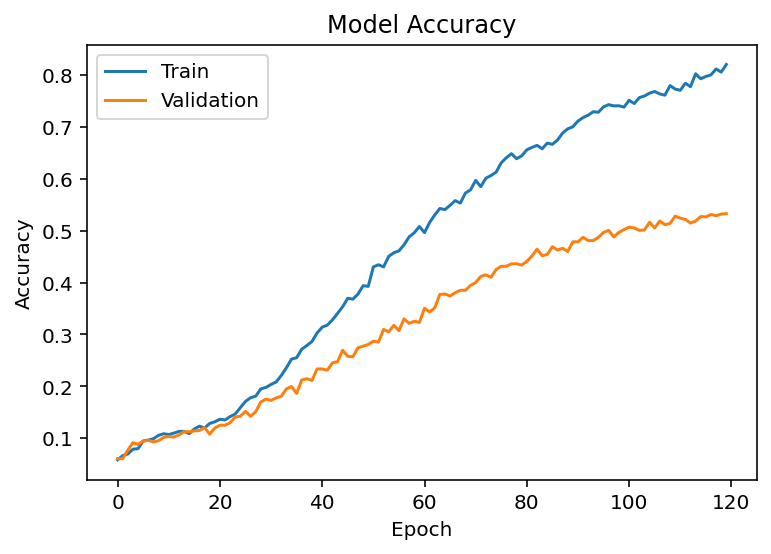

In [23]:
print(gd.history.keys())
#  "Accuracy"
plt.plot(gd.history['accuracy'])
plt.plot(gd.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

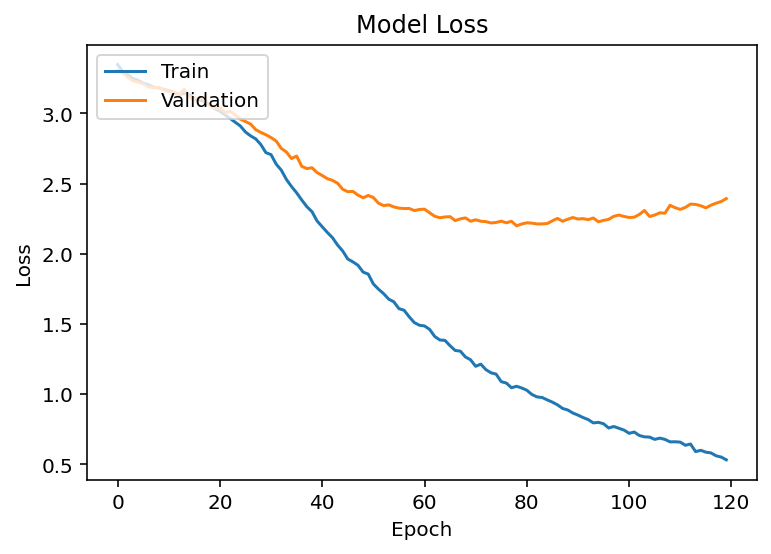

In [24]:
# "Loss"
plt.plot(gd.history['loss'])
plt.plot(gd.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()